<a href="https://colab.research.google.com/github/igorgatchin1993/assigments/blob/main/Gatchin_Igor__%22questions_chapter2_student_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [3]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/kc_house_data.csv")

data.head(10)

KeyboardInterrupt: ignored

Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

Q:
What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Answer:
A machine learning pipeline is a sequence of automated processes that are used to transform raw data into a final predictive model. 

Let's consider a data set of real estate properties that includes various features such as the number of bedrooms, the square footage, the location, and the sale price. 

Follwoing steps:

Data collection: Gathering the real estate data from various sources and organizing it into a single data set.
Data cleaning and preprocessing: Handling missing values, removing outliers, and converting categorical data into numerical data.

Feature engineering: Creating new features such as the price per square foot, the age of the property, and the proximity to amenities such as schools and parks.
Feature selection: Identifying the most relevant features that are likely to impact the target variable (e.g., sale price).

Model selection: Choosing an appropriate algorithm (e.g., linear regression, random forest, or neural network) that best fits the data and the problem being solved.
Model training: Training the algorithm on a subset of the data to learn patterns and make predictions.
Model evaluation: Testing the accuracy and performance of the model using a validation set or cross-validation techniques.

Hyperparameter tuning: Fine-tuning the model's hyperparameters to achieve optimal performance.
Model deployment: Deploying the final model in a production environment and integrating it with other systems.
By following this machine learning pipeline, we can create a predictive model that can help real estate agents and homeowners to estimate the market value of a property, and make informed decisions about buying, selling, or renovating it.

Q: 
Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

Answer:

We use a supervised regression learning task with certain features to predict the estimated value of the property.
We use a batch learning, because it trains your deep learning model without splitting to batches.

Q:
What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?

Answer:

Performance measure is a metric used to evaluate how well a model is performing on a given task. The choice of performance measure depends on the type of task and the specific problem being solved. Common performance measures for regression models include mean squared error (MSE) and mean absolute error (MAE).

Mean squared error (MSE): This performance measure calculates the average squared difference between the predicted values and the true values

Mean absolute error (MAE): This performance measure calculates the average absolute difference between the predicted values and the true values. 

In a linear regression, both the MSE and MAE can be interpreted as the average distance between the predicted values and the true values. A lower value of either metric indicates better performance of the model. For example, if the MSE is 10, it means that on average, the predicted values are 10 units



##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:
# YOUR TASK
#Display the first 5 lines of the data set
data.head()
#shows some statistical report like standart deviation
data.describe()
#shows data type
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

<ipython-input-13-550f2bf02d1f>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

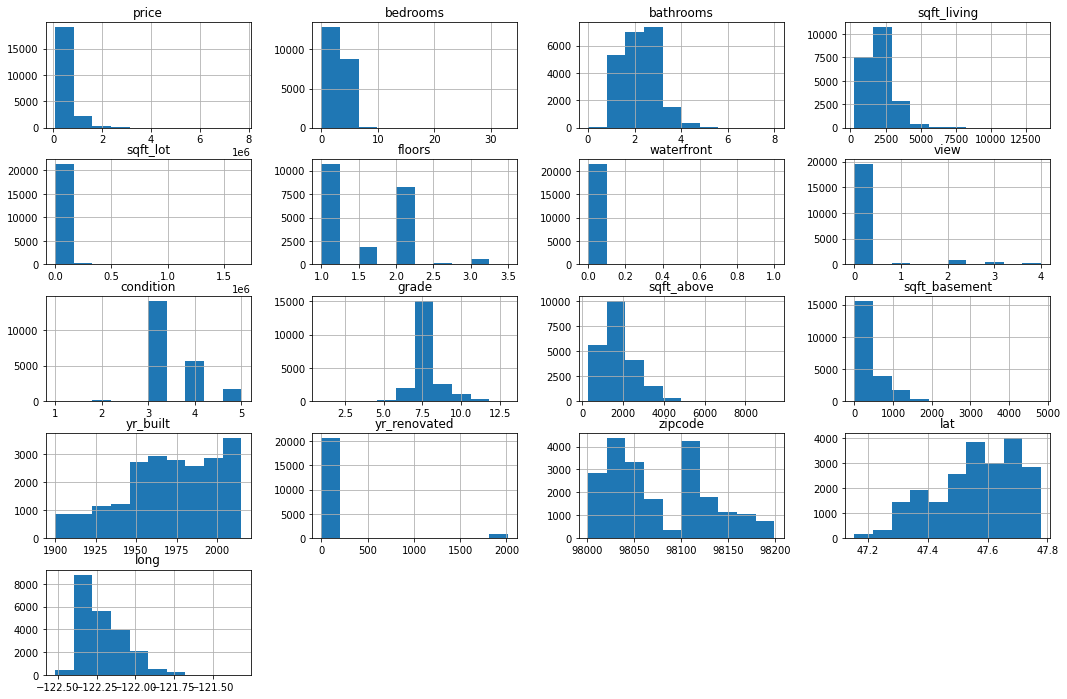

In [ ]:
from time import thread_time
fig, ax = plt.subplots(figsize=(18, 12))
data.hist(ax=ax)
__________________________________
Yes, I found that a lot of distributions are skewed.
Right-skewed - means that more houses in a higher latitudes
Left-skewed - means that we have only a few houses  

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

We use the in wchich year the house was builded 

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['date'] = data['date'].dt.strftime('%Y-%m-%d')
data['renovated'] = (data['yr_renovated'] > data['yr_built']).astype(int)
data['yr_renovated'] = data[['yr_renovated', 'yr_built']].max(axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,0


##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

Stratified sampling is a statistical sampling technique that involves dividing a population into subgroups or strata based on certain characteristics, such as age, gender, income, education level, or geographic location. The idea is to ensure that each stratum is represented in the sample proportionately to its size in the population.
Once the population is divided into strata, a random sample is then taken from each stratum, with the size of the sample being proportional to the size of the stratum in the population. This helps to ensure that the sample is representative of the population and can be used to make accurate inferences about the entire population.
Stratified sampling is often used when the population is heterogeneous and there is a desire to ensure that the sample is representative of the entire population, rather than just a particular subgroup. It is also useful when the variable being studied varies greatly across different subgroups in the population.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data['categories'] = pd.cut(data['price'], bins=[0, np.percentile(data['price'], 25), np.percentile(data['price'], 50), np.percentile(data['price'], 75), np.inf], labels=[1, 2, 3, 4])

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data['categories'])


train_set = train_set.copy()
test_set = test_set.copy()

In [ ]:
data = train_set.copy()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,categories
19549,2014-08-07,419950.0,4,2.50,2260,5164,2.0,0,0,3,8,2260,0,1996,1996,98056,47.5090,-122.166,0,2
7318,2015-03-31,305000.0,3,2.50,1260,895,3.0,0,0,3,7,1160,100,2009,2009,98133,47.7072,-122.336,0,1
13501,2014-10-23,207000.0,4,2.00,1690,7728,1.5,0,0,4,7,1690,0,1967,1967,98198,47.3666,-122.318,0,1
9018,2014-08-18,580000.0,5,2.50,3110,15783,1.0,0,0,3,8,1720,1390,1974,1974,98052,47.6301,-122.103,0,3
6224,2014-10-07,606000.0,3,1.75,1970,8540,1.0,0,3,4,8,1130,840,1950,1950,98177,47.7213,-122.365,0,3
16423,2014-08-05,558000.0,4,2.50,3220,5120,2.0,0,0,3,9,2420,800,2000,2000,98118,47.5434,-122.270,0,3
65,2014-11-20,317625.0,3,2.75,2770,3809,1.5,0,0,5,7,1770,1000,1925,1925,98144,47.5747,-122.304,0,1
427,2015-02-25,1300000.0,3,2.00,2350,15021,1.0,0,0,4,8,1770,580,1976,1976,98004,47.6408,-122.219,0,4
15955,2015-03-31,850000.0,2,1.50,2210,5000,1.0,0,2,3,8,1530,680,1951,1951,98122,47.6122,-122.288,0,4
18375,2014-07-01,952500.0,4,1.50,2550,5055,2.0,0,0,4,10,2550,0,1910,1910,98112,47.6360,-122.301,0,4


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? 

Expensive Houses are located between 47,5 and 47,8 of the latitude

For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

To simplify the feature by displaying the expensive and the cheap districts 

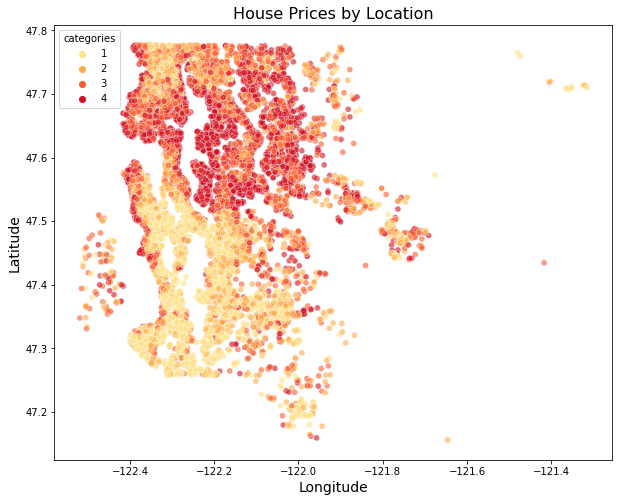

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='long', y='lat', hue='categories', palette='YlOrRd', alpha=0.6)
plt.title('House Prices by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? 

Answer:
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation

What are probably the best variables to predict? 
Answer: In general, continuous variables that are highly correlated with the outcome variable tend to be good predictors. For example, if you are trying to predict the price of a house, variables such as square footage, number of bedrooms, and location are likely to be good predictors since they are highly correlated with house prices.

Additionally, it's important to consider the practical significance of the correlations. For example, while there may be a statistically significant correlation between shoe size and income, it is unlikely to be a practical predictor since the relationship is not meaningful or useful.

For which variables does the Pearson coefficient make sense and for which not?

Answer:  The Pearson correlation coefficient, also known as the Pearson product-moment correlation coefficient, is a measure of the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to +1, with values of -1 indicating a perfect negative correlation, 0 indicating no correlation, and +1 indicating a perfect positive correlation.

The Pearson correlation coefficient makes sense for continuous variables that are measured on an interval or ratio scale, such as height, weight, temperature, or time. These variables have meaningful numerical values and can be compared mathematically.

However, the Pearson correlation coefficient is not appropriate for variables that are categorical, nominal, or ordinal in nature, such as gender, race, religion,

In [ ]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

A: it indicates that all tend have a positive correlation with the price of the house

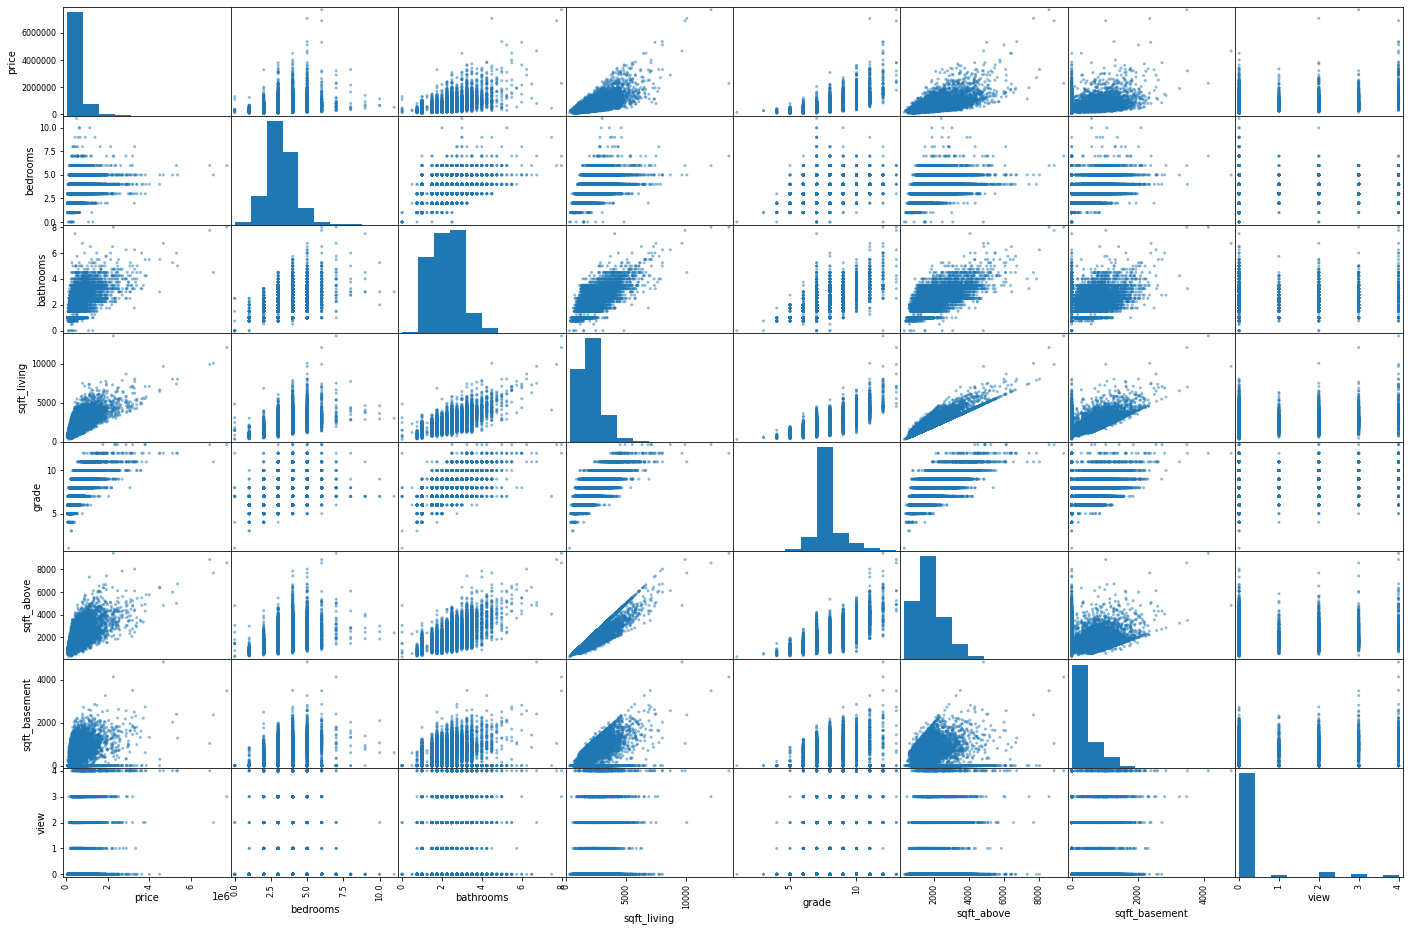

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "bedrooms", "bathrooms", "sqft_living", "grade", "sqft_above", "sqft_basement", "view"]
scatter_matrix(data[attributes], figsize=(24, 16))
plt.show()
     

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


price              1.000000
sqft_living        0.702035
grade              0.667434
sqft_above         0.605567
bathrooms          0.525138
view               0.397293
sqft_basement      0.323816
bedrooms           0.308350
lat                0.307003
waterfront         0.266369
floors             0.256794
yr_renovated       0.126434
sqft_lot           0.089661
yr_built           0.054012
condition          0.036362
long               0.021626
zipcode           -0.053203
bedroom_density   -0.468367
Name: price, dtype: float64

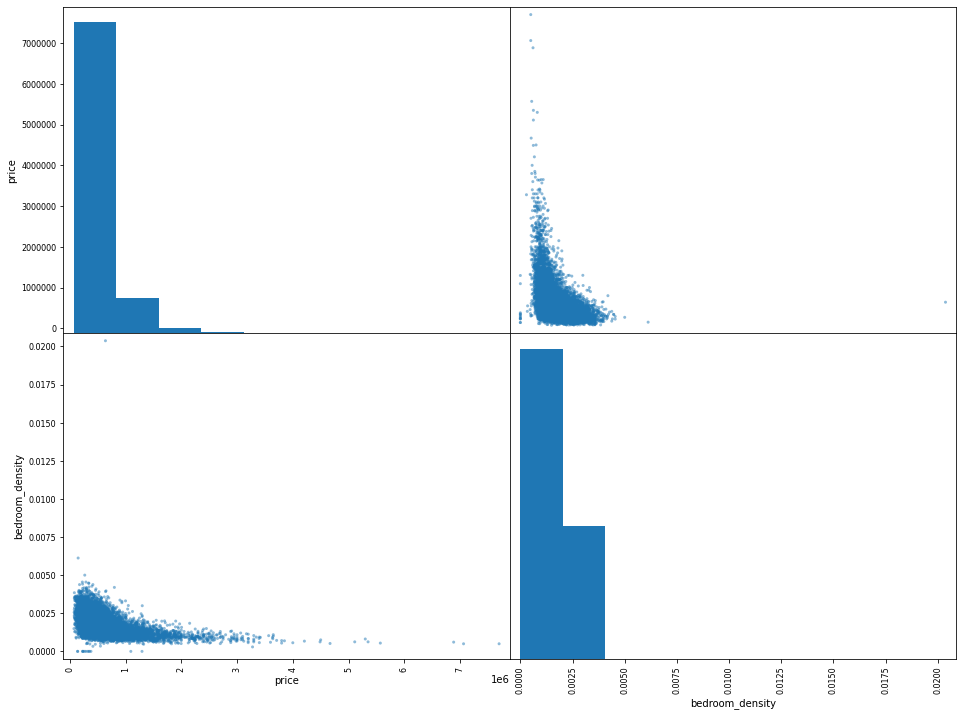

In [ ]:
from pandas.plotting import scatter_matrix


data['bedroom_density'] = data['bedrooms'] / data['sqft_living']

attributes = ['price', 'bedroom_density']
scatter_matrix(data[attributes], figsize=(16, 12))

corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

NameError: ignored

###Missing Data

What options do we have to deal with missing values?

SimpleImputer(strategy="median") replaces all missing attributes with the mean of that attribute

 What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

In [ ]:
#YOUR TASK: Write a code that give all lines, which have any missing value. 
data.isna().sum()
#No missng values

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
renovated          0
categories         0
bedroom_density    0
dtype: int64

###Handling Text and Categorical Attributes


What are ordinal and categorical data? 
A: Ordinal data refers to data that can be ranked or ordered, but the differences between the values are not necessarily meaningful or equal. For example, a rating of 1-5 stars for a restaurant could be considered ordinal data, as the values can be ranked from worst to best, but the difference between a 3-star rating and a 4-star rating may not be the same as the difference between a 4-star rating and a 5-star rating.

Categorical data, on the other hand, refers to data that can be grouped into distinct categories or labels, but cannot be ordered or ranked. For example, gender, race, or job type can be considered categorical data as they cannot be ordered or ranked. Categorical data can be further divided into nominal and ordinal categories. Nominal categories have no natural order, such as eye color or city of residence, while ordinal categories have a natural order, such as education level (elementary, high school, bachelor's degree, etc.).

Do we have such data in our data set? 
A: waterfront is categorical
condition is ordinal
zipcode is categorical
grade is ordinal



What possibilities do we have to transform this data correctly? 

Answer:
Data Aggregation: This involves summarizing data at a higher level, such as grouping data by category or time period. This can be useful for analyzing trends or patterns in the data.

Data Encoding: This involves converting categorical data into numeric values, such as using one-hot encoding or label encoding.

What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

A dummy variable is a binary variable that takes on a value of 0 or 1 to represent the presence or absence of a particular category. For example, suppose we have a categorical variable "color" that can take on values of "red", "green", or "blue". We could create three dummy variables, one for each category, that take on a value of 1 when the corresponding category is present and 0 otherwise. So we might have variables "is_red", "is_green", and "is_blue", where "is_red" would be 1 if the color is red and 0 otherwise, and so on.

The OneHotEncoder() function is a method for creating dummy variables in Python. It takes a categorical variable as input and returns a matrix of binary variables representing the categories. Specifically, it creates a binary variable for each category in the input variable and sets the value to 1 when that category is present and 0 otherwise.
In the context of the variable "waterfront", the OneHotEncoder() function would create two binary variables: one representing the presence of a waterfront ("waterfront_1") and one representing the absence of a waterfront ("waterfront_0"). The value of "waterfront_1" would be 1 if the property has a waterfront and 0 otherwise, while the value of "waterfront_0" would be 1 if the property does not have a waterfront and 0 otherwise.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

waterfront_encoded = cat_encoder.fit_transform(data[["waterfront"]])
waterfront_encoded

<21613x2 sparse matrix of type '<class 'numpy.float64'>'
	with 21613 stored elements in Compressed Sparse Row format>

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? 

Min-max scaling and standardization are two common techniques used for feature scaling in machine learning.
Min-max scaling (also called normalization) is a method of scaling numeric features to a range between 0 and 1. It involves subtracting the minimum value of the feature and then dividing by the range of the feature (the difference between the maximum and minimum values). 

Standardization, on the other hand, involves scaling numeric features to have a mean of 0 and a standard deviation of 1. It involves subtracting the mean of the feature and then dividing by the standard deviation. This ensures that the feature has a similar scale and distribution to a standard normal distribution (i.e., a normal distribution with mean 0 and standard deviation

What is a heavy tail in a distribution? 
A heavy tail in a distribution refers to the presence of outliers or extreme values that occur more frequently than would be expected in a normal distribution. Specifically, a heavy-tailed distribution has a larger number of data points in the tails of the distribution (i.e., the extreme values) than would be expected based on a normal distribution.

What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

One problem with min-max scaling and standardization on a heavy-tailed distribution is that extreme values may have a disproportionate influence on the scaled values of the features. This is because the formulae used in min-max scaling and standardization involve the minimum and maximum values (in the case of min-max scaling) or the mean and standard deviation (in the case of standardization) of the distribution. When the distribution has heavy tails, the minimum and maximum values or the mean and standard deviation may be heavily influenced by a few extreme values, resulting in scaled values that are not representative of the majority of the data.↳

For example, let's consider a dataset of income levels for a population. Suppose that the distribution of income levels is heavy-tailed, with a few individuals having very high incomes. If we were to use min-max scaling or standardization on this dataset without accounting for the heavy-tailed distribution, the scaled values of the income feature may be heavily influenced by the extreme values of the few individuals with very high incomes. This could result in scaled values that are not representative of the majority of the population, leading to biased analyses or machine learning models.
To address this issue, one approach is to use robust scaling techniques that are less sensitive to extreme values, such as median scaling or robust standardization. These methods use the median and interquartile range (IQR) instead of the mean and standard deviation to scale the features, which are less affected by extreme values. This can result in more robust and representative scaled values for the majority of the data.

In [ ]:
data.columns

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! 

Here are some guesses for variable conversions that make sense for each variable:

price: Scaling using either min-max scaling or standardization could be useful, since the range of prices could be quite large and heavy-tailed.


bedrooms, bathrooms, sqft_living, sqft_lot: These variables could benefit from min-max scaling or standardization to ensure that they are on the same scale and to help prevent outliers from having too much influence.


floors: This variable could be converted to a binary variable indicating whether the house has multiple floors or not.


waterfront: This variable could be converted to a binary variable indicating whether the property is located on a waterfront or not.


view, condition, grade: These variables could be kept as categorical variables, or converted to dummy variables if needed for a particular analysis.


lat and long: In the code block above, these variables are used to calculate the similarity of each data point to each of 15 different clusters, using a radial basis function kernel. This is a clustering-based transformation, which is different from scaling or categorical conversion.




Try to understand the following two code blocks, how are the variables *long* and *lat* converted?


Regarding the code blocks above, the variables lat and long are used to calculate the similarity of each data point to each of 15 different clusters, using a radial basis function kernel. This is done using the ClusterSimilarity transformer class, which is a custom transformer that inherits from scikit-learn's BaseEstimator and TransformerMixin classes. The fit method of the transformer fits a k-means clustering model to the data, while the transform method calculates the similarity of each data point to each of the k-means cluster centers using a radial basis function kernel. Finally, the max method is used to calculate the maximum similarity for each data point across all clusters, which is then added as a new feature to the dataset in the Max cluster similarity column. This new feature is then plotted on a scatter plot using the Longitude and Latitude variables as the x- and y-axes, respectively, with the color of each data point indicating the maximum similarity to any of the 15 clusters. The cluster centers are also plotted as black X's on the same plot.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

NameError: ignored

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

In this code, you have made several variable transformations using pipelines and transformers from scikit-learn:↳

For the "date" variable, you have transformed it into the number of seconds from the current time using the FunctionTransformer and pd.to_datetime() functions. You have then scaled this new variable using the StandardScaler.
For the "sqft_living", "sqft_lot", and "sqft_above" variables, you have transformed them using the natural logarithm (np.log) and then scaled them using the StandardScaler.

For the "waterfront" and "renovated" variables, you have used the OneHotEncoder to transform them into dummy variables.
For the "lat" and "long" variables, you have used the KMeans clustering algorithm to group similar values together and then used the rbf_kernel to calculate the similarity between each data point and the cluster centers. The resulting similarities have been added as new features to the data set.
For the remaining numerical variables ("yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", and "grade"), you have scaled them using the StandardScaler.
These transformations have been applied using the ColumnTransformer, which allows you to apply different transformations to different subsets of the data.

The arguments in favor of these transformations are that they can help to improve the performance of machine learning models by making the data more suitable for the algorithms being used. For example, scaling the data can help to ensure that variables with larger ranges of values do not dominate the model, while converting categorical variables into dummy variables can allow the model to better capture the relationship between those variables and the target variable.
However, there are also arguments against some of these transformations. For example, using the natural logarithm can introduce bias if there are many zero values in the data, and using KMeans clustering can be sensitive to the choice of the number of clusters.
Regarding your question about how I would convert the variables compared to your guess, it's difficult to say without knowing what variables are in the data set and what the ultimate goal is. However, I would say that your suggested conversions seem reasonable, and that the transformations used in the code you provided also seem appropriate for the variables being transformed.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

NameError: ignored

How many features do we have for predicition?

31 

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape
df_new = pd.DataFrame(data_prepared)
df_new.head()

NameError: ignored

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [ ]:
from sklearn.linear_model import LinearRegression

#label is preprocessed
data_label_transformed = preprocessing_label.fit_transform(data_label)

#instances of LinearRegression predictor including preprocessing
lin_reg = make_pipeline(preprocessing, LinearRegression())
#fit model on training data
lin_reg.fit(data, data_label_transformed)
#make preditions (still on training data) 
data_predictions = lin_reg.predict(data)

NameError: ignored

Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [ ]:
data_predictions_orig = np.exp(data_predictions)
data_label_transformed_orig = np.exp(data_label_transformed)

abs_error = np.abs(data_predictions_orig - data_label_transformed_orig)
median_abs_error = np.median(abs_error)
rmse = np.sqrt(np.mean(np.square(data_predictions_orig - data_label_transformed_orig)))

median_price = np.median(data_label_transformed_orig)
pct_error = median_abs_error / median_price * 100

print(f"Median absolute error: {median_abs_error}")
print(f"RMSE: {rmse}")
print(f"Median home price: {median_price}")
print(f"Percentage error: {pct_error}")

# its good from my point of view

Median absolute error: 49686.75417253602
RMSE: 146042.37698200566
Median home price: 450000.00000000035
Percentage error: 11.041500927230219

###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation?


answer: Cross Validation randomly splits the training set into 10 nonoverlapping subsets called folds, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores

 Why have I adjusted the R squared error with a separate function? 

 This function takes the true target values and the predicted values as inputs and returns the negative square root of the mean squared error of the exponential of the target values and the predicted values. 
 
 What is the function *np.ravel* doing?

 The np.ravel function is used to convert the target variable to a 1-dimensional array. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



NameError: ignored

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

The code you provided outputs the descriptive statistics of the RMSE values for the Random Forest model using 10-fold cross-validation. The output shows that there were 10 samples or folds, with a mean RMSE of -130975.847936, a standard deviation of 8748.597452, a minimum RMSE of -144002.146324, and a maximum RMSE of -119485.220736.

In [ ]:
pd.Series(forest_rmses).describe()

NameError: ignored

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do.  

Grid Search and Random Search are hyperparameter tuning methods used to find the optimal combination of hyperparameters for a machine learning algorithm.
Grid Search involves exhaustively trying all possible combinations of hyperparameters specified in a predefined grid. This means that Grid Search evaluates the performance of the model for every possible combination of hyperparameters in the grid, and returns the combination that results in the best performance.

What are the advantages of each method.
 The advantage of Grid Search is that it guarantees that the optimal combination of hyperparameters will be found, but it can be computationally expensive, especially when dealing with a large number of hyperparameters or a large search space.


 For which parameters would this make sense in our example?

 In our example hyperparameters that can be tuned using Grid Search or Random Search

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, data_label_transformed, test_size=0.2, random_state=42)

# Define the Random Forest model with tuned hyperparameters
rf = RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Train the Random Forest model on the training set
rf.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = rf.predict(X_test)

# Invert the predictions and true labels to their original scale using exponential transformation
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

# Compute the RMSE and MAE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Compute the median and 95% confidence interval of the RMSE using bootstrapping
n_bootstraps = 1000
bootstrapped_rmse = []
rng = np.random.RandomState(42)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_test), len(y_test))
    bootstrap_y_test = y_test[indices]
    bootstrap_y_pred = y_pred[indices]
    bootstrap_rmse = np.sqrt(mean_squared_error(bootstrap_y_test, bootstrap_y_pred))
    bootstrapped_rmse.append(bootstrap_rmse)

bootstrapped_rmse = np.array(bootstrapped_rmse)
median_rmse = np.median(bootstrapped_rmse)
ci_rmse = np.percentile(bootstrapped_rmse, [2.5, 97.5])

# Compute the median of the MAE
median_mae = np.median(np.abs(y_pred - y_test))

# Print the results
print("Median RMSE: {:.2f}".format(median_rmse))
print("95% Confidence Interval of RMSE: [{:.2f}, {:.2f}]".format(ci_rmse[0], ci_rmse[1]))
print("Median MAE: {:.2f}".format(median_mae))


##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

We can use the pickle module in Python to save and reload our model. Here's an example:

Why is it possible that we need a monitoring code?

It is possible that we need a monitoring code to keep track of the performance of our model over time. As new data becomes available, the performance of the model may degrade if the underlying distribution of the data changes. A monitoring code can help us detect when the performance of the model has degraded and take appropriate action, such as retraining the model on more recent data or adjusting the hyperparameters. This can help us maintain the accuracy of the model over time.

Try to save our learned model so that we can reload it at any time.

In [ ]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(forest_reg, f)

# Reload the model
with open('model.pkl', 'rb') as f:
    forest_reg = pickle.load(f)


##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 